In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import os

In [69]:
print("Current directory:", os.getcwd())

Current directory: E:\coding\nayan-clss


In [145]:
colors = {'syntactic': 'blue', 'semantic': 'red', 'repetition': 'green'}

## Gemma e4 graph

In [70]:
gemma_e4_df = pd.read_csv('Data/gemma7b-it/gemma7b-it e4_results.csv')
gemma_e4_df

,id,distractor_type,distractor_length,logp,forbidden_concept,logp_smoothed
0,0,syntactic,0,-31.000,thing,-29.764688
1,1,syntactic,0,-30.000,thing,-29.764688
2,2,syntactic,0,-25.375,thing,-29.764688
3,3,syntactic,0,-25.375,thing,-29.764688
4,4,syntactic,0,-29.125,thing,-29.764688
...,...,...,...,...,...,...
29983,1661,repetition,4096,-30.000,tree,-30.582486
29984,1662,repetition,4096,-30.000,tree,-30.582486
29985,1663,repetition,4096,-32.000,tree,-30.582486
29986,1664,repetition,4096,-28.750,tree,-30.582486


In [77]:
gemma_e4_aggregated_data = gemma_e4_df.groupby(['distractor_type', 'distractor_length'])['logp_smoothed'].agg(['mean', 'std', 'count']).reset_index()
gemma_e4_aggregated_data

,distractor_type,distractor_length,mean,std,count
0,repetition,0,-29.713922,0.0,1666
1,repetition,64,-25.225891,0.0,1666
2,repetition,256,-24.488512,0.0,1666
3,repetition,1024,-28.467429,0.0,1666
4,repetition,2048,-30.034045,0.0,1666
5,repetition,4096,-30.582486,0.0,1666
6,semantic,0,-29.836649,0.0,1666
7,semantic,64,-26.147195,0.0,1666
8,semantic,256,-27.091196,0.0,1666
9,semantic,1024,-27.893474,0.0,1666


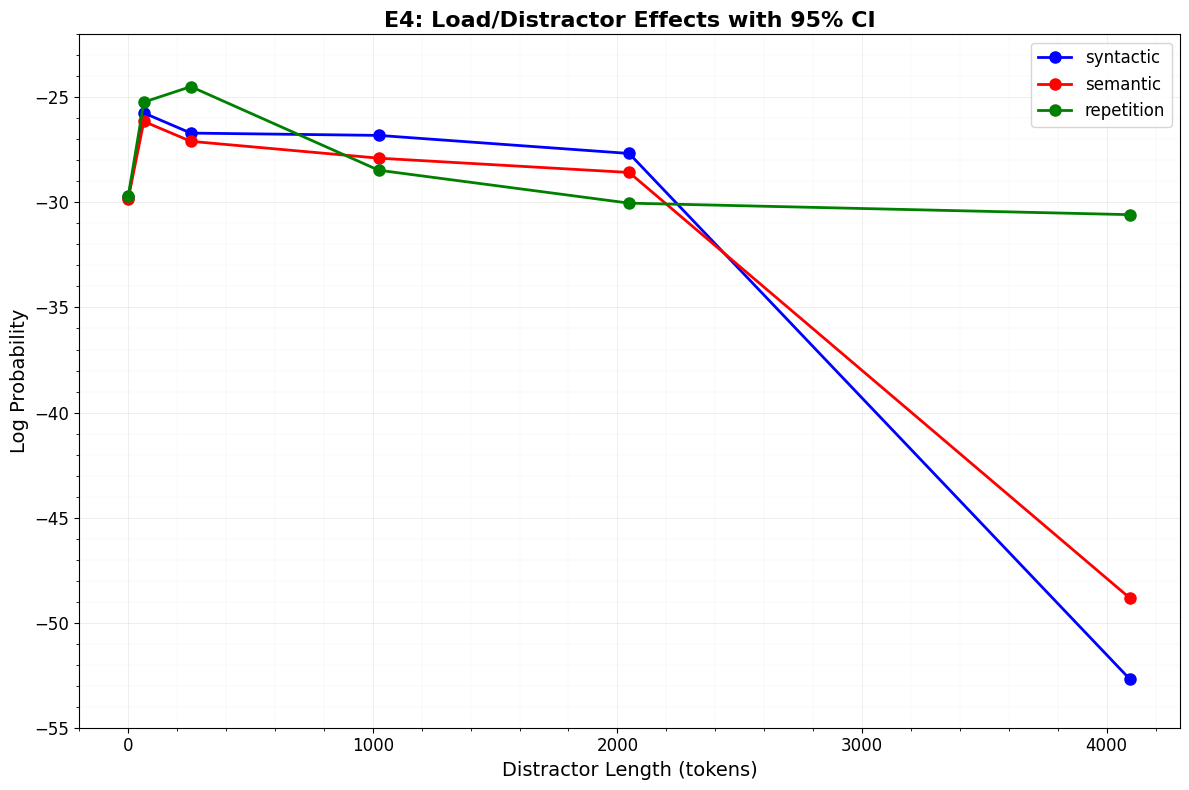

In [141]:
# gemma e4 plot

gemma_e4_aggregated_data.columns = ['distractor_type', 'distractor_length', 'logp_smoothed', 'std_logp', 'count']

gemma_e4_syntactic_data = gemma_e4_aggregated_data[gemma_e4_aggregated_data['distractor_type'] == 'syntactic'].sort_values('distractor_length')
gemma_e4_semantic_data = gemma_e4_aggregated_data[gemma_e4_aggregated_data['distractor_type'] == 'semantic'].sort_values('distractor_length')
gemma_e4_repetition_data = gemma_e4_aggregated_data[gemma_e4_aggregated_data['distractor_type'] == 'repetition'].sort_values('distractor_length')

plt.figure(figsize=(12, 8))

plt.plot(gemma_e4_syntactic_data['distractor_length'], gemma_e4_syntactic_data['logp_smoothed'], 
         'o-', color='blue', linewidth=2, markersize=8, label='syntactic')
plt.plot(gemma_e4_semantic_data['distractor_length'], gemma_e4_semantic_data['logp_smoothed'], 
         'o-', color='red', linewidth=2, markersize=8, label='semantic')
plt.plot(gemma_e4_repetition_data['distractor_length'], gemma_e4_repetition_data['logp_smoothed'], 
         'o-', color='green', linewidth=2, markersize=8, label='repetition')

plt.xlabel('Distractor Length (tokens)', fontsize=14)
plt.ylabel('Log Probability', fontsize=14)
plt.title('E4: Load/Distractor Effects with 95% CI', fontsize=16, fontweight='bold')

plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.15, linestyle='-', linewidth=0.3, which='minor')

plt.xlim(-200, 4300)
plt.ylim(-55, -22)

plt.xticks([0, 1000, 2000, 3000, 4000], fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12, loc='upper right')

plt.tight_layout()

plt.minorticks_on()

#plt.savefig('gemma7b-it_e4_graph.png', 
            #dpi=300, 
            #bbox_inches='tight',
            #facecolor='white')

plt.show()

In [142]:
for dist_type in ['syntactic', 'semantic', 'repetition']:
    type_data = gemma_e4_df[gemma_e4_df['distractor_type'] == dist_type]
    
    print(f"\n{dist_type.upper()}:")
    for length in sorted(type_data['distractor_length'].unique()):
        length_data = type_data[type_data['distractor_length'] == length]
        raw_mean = length_data['logp'].mean()
        # Get the smoothed value (they should all be the same for a given length/type)
        smoothed_val = length_data['logp_smoothed'].iloc[0]
        
        print(f"  Length {length}: raw_mean={raw_mean:.4f}, smoothed={smoothed_val:.4f}, "
              f"diff={abs(raw_mean - smoothed_val):.4f}")


SYNTACTIC:
  Length 0: raw_mean=-31.4752, smoothed=-29.7647, diff=1.7106
  Length 64: raw_mean=-25.8218, smoothed=-25.7435, diff=0.0783
  Length 256: raw_mean=-26.7689, smoothed=-26.7001, diff=0.0688
  Length 1024: raw_mean=-27.0852, smoothed=-26.8096, diff=0.2755
  Length 2048: raw_mean=-28.0185, smoothed=-27.6702, diff=0.3484
  Length 4096: raw_mean=-51.1855, smoothed=-52.7015, diff=1.5160

SEMANTIC:
  Length 0: raw_mean=-31.4752, smoothed=-29.8366, diff=1.6386
  Length 64: raw_mean=-26.0971, smoothed=-26.1472, diff=0.0501
  Length 256: raw_mean=-26.9786, smoothed=-27.0912, diff=0.1126
  Length 1024: raw_mean=-27.8963, smoothed=-27.8935, diff=0.0028
  Length 2048: raw_mean=-28.7426, smoothed=-28.5739, diff=0.1687
  Length 4096: raw_mean=-49.2934, smoothed=-48.8407, diff=0.4527

REPETITION:
  Length 0: raw_mean=-31.4752, smoothed=-29.7139, diff=1.7613
  Length 64: raw_mean=-25.2279, smoothed=-25.2259, diff=0.0020
  Length 256: raw_mean=-24.3150, smoothed=-24.4885, diff=0.1735
  Lengt

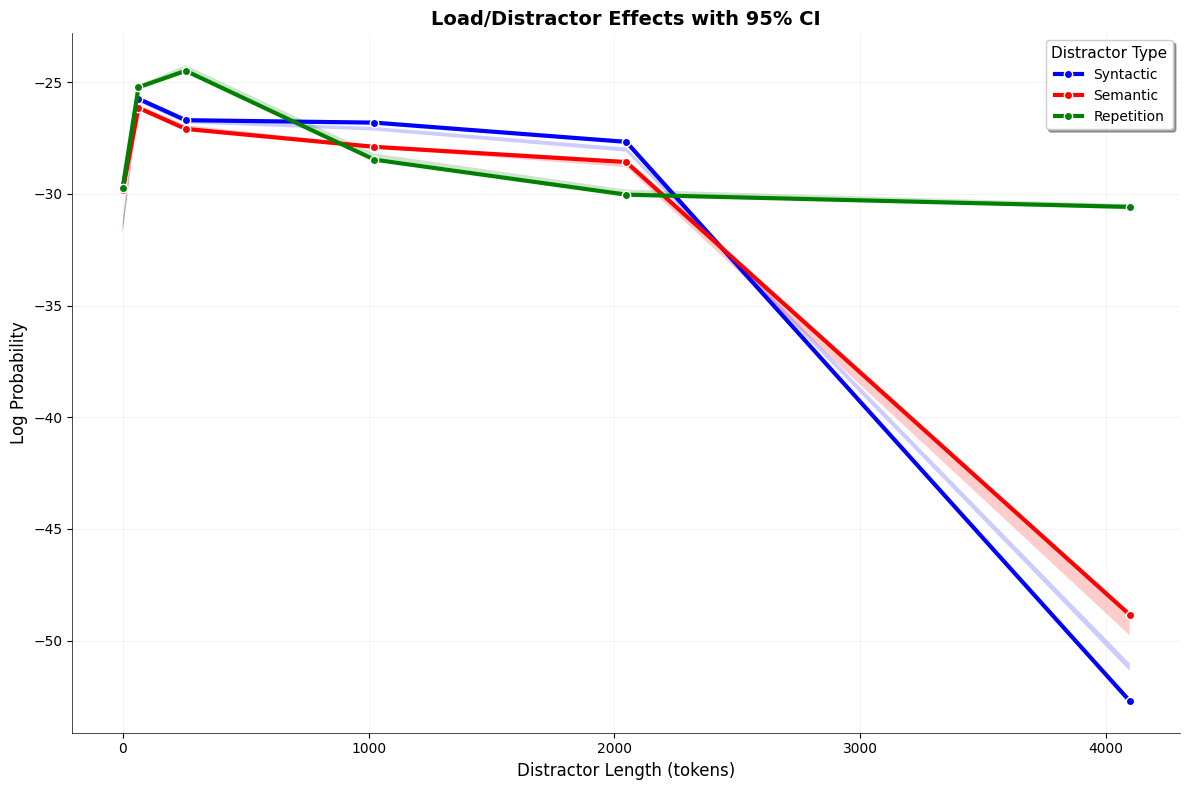

In [151]:
fig, ax = plt.subplots(figsize=(12, 8))

for dist_type in ['syntactic', 'semantic', 'repetition']:
    type_data = gemma_e4_df[gemma_e4_df['distractor_type'] == dist_type]
    color = colors[dist_type]
    
    unique_lengths = sorted(type_data['distractor_length'].unique())
    means = []
    ci_lower = []
    ci_upper = []

    for length in unique_lengths: 
        length_data = type_data[type_data['distractor_length'] == length]['logp'].values
        mean = np.mean(length_data)
        means.append(mean)
        
        sem = stats.sem(length_data)
        ci = stats.t.interval(0.95, len(length_data)-1, loc=mean, scale=sem)
        ci_lower.append(ci[0])
        ci_upper.append(ci[1])

    ax.fill_between(unique_lengths, ci_lower, ci_upper, alpha=0.2, color=color, edgecolor='none')
    
    smooth_data = type_data.groupby('distractor_length')['logp_smoothed'].first()
    ax.plot(smooth_data.index, smooth_data.values, 
            linewidth=3, color=color, label=f'{dist_type.capitalize()}',
            marker='o', markersize=6, markeredgecolor='white', markeredgewidth=1)

ax.set_xlabel('Distractor Length (tokens)', fontsize=12, fontweight='medium')
ax.set_ylabel('Log Probability', fontsize=12, fontweight='medium')
ax.set_title('Load/Distractor Effects with 95% CI', 
             fontsize=14, fontweight='bold')

ax.legend(title='Distractor Type', title_fontsize=11, fontsize=10, 
          loc='best', frameon=True, fancybox=True, shadow=True)

ax.grid(True, alpha=0.2, linestyle='-', linewidth=0.5)

ax.set_xticks([0, 1000, 2000, 3000, 4000])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.tight_layout()
plt.show()

# plt.savefig('distractor_effects.pdf', dpi=300, bbox_inches='tight')

## gpt2-small e4 graph

In [107]:
gpt2_e4_df = pd.read_csv('Data/gpt2-small/gpt2-small e4_results.csv')
gpt2_e4_df 

,id,distractor_type,distractor_length,logp,forbidden_concept,logp_smoothed
0,0,syntactic,0,-13.6875,thing,-13.788894
1,1,syntactic,0,-16.8750,thing,-13.788894
2,2,syntactic,0,-13.0625,thing,-13.788894
3,3,syntactic,0,-13.0625,thing,-13.788894
4,4,syntactic,0,-15.6250,thing,-13.788894
...,...,...,...,...,...,...
29983,1661,repetition,4096,-25.8750,tree,-21.315684
29984,1662,repetition,4096,-14.2500,tree,-21.315684
29985,1663,repetition,4096,-24.0000,tree,-21.315684
29986,1664,repetition,4096,-21.5000,tree,-21.315684


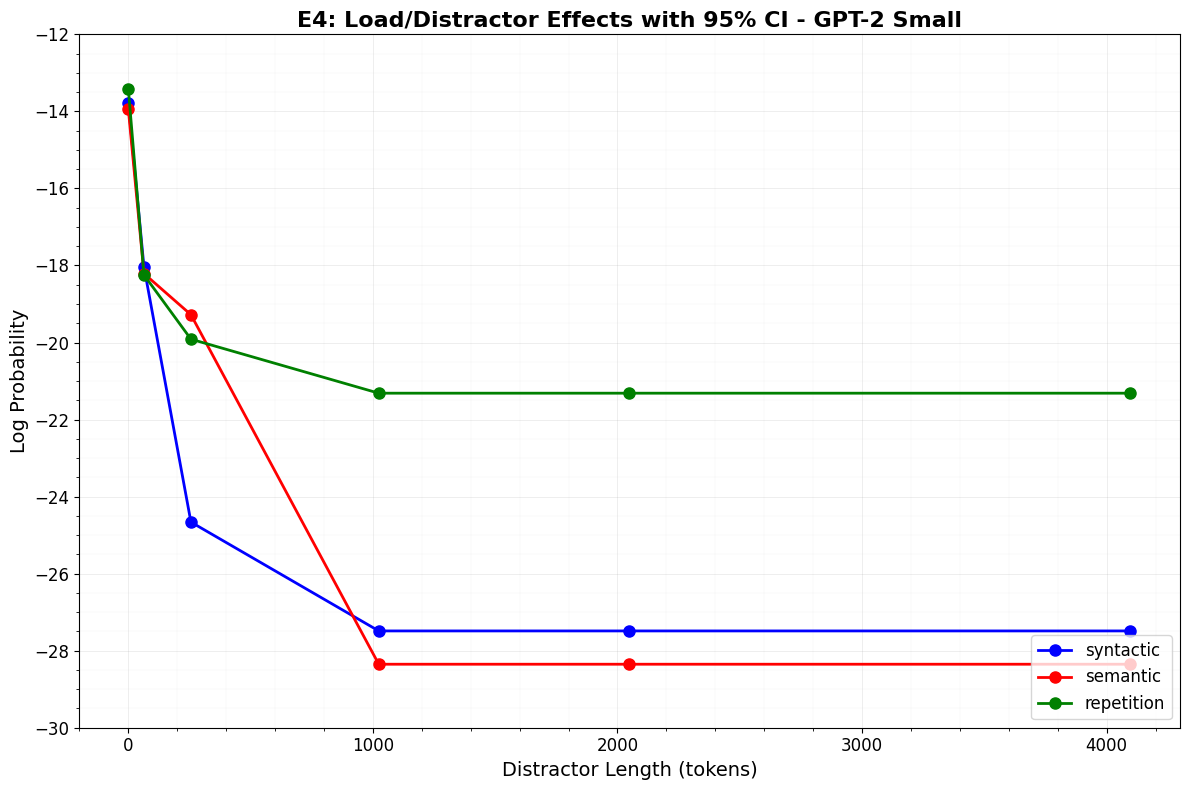

In [108]:
# gpt2-small e4 plot

gpt2_e4_aggregated_data = gpt2_e4_df .groupby(['distractor_type', 'distractor_length'])['logp_smoothed'].agg(['mean', 'std', 'count']).reset_index()
gpt2_e4_aggregated_data.columns = ['distractor_type', 'distractor_length', 'logp_smoothed', 'std_logp', 'count']

gpt2_e4_syntactic_data = gpt2_e4_aggregated_data[gpt2_e4_aggregated_data['distractor_type'] == 'syntactic'].sort_values('distractor_length')
gpt2_e4_semantic_data = gpt2_e4_aggregated_data[gpt2_e4_aggregated_data['distractor_type'] == 'semantic'].sort_values('distractor_length')
gpt2_e4_repetition_data = gpt2_e4_aggregated_data[gpt2_e4_aggregated_data['distractor_type'] == 'repetition'].sort_values('distractor_length')

plt.figure(figsize=(12, 8))

plt.plot(gpt2_e4_syntactic_data['distractor_length'], gpt2_e4_syntactic_data['logp_smoothed'], 
         'o-', color='blue', linewidth=2, markersize=8, label='syntactic')
plt.plot(gpt2_e4_semantic_data['distractor_length'], gpt2_e4_semantic_data['logp_smoothed'], 
         'o-', color='red', linewidth=2, markersize=8, label='semantic')
plt.plot(gpt2_e4_repetition_data['distractor_length'], gpt2_e4_repetition_data['logp_smoothed'], 
         'o-', color='green', linewidth=2, markersize=8, label='repetition')

plt.xlabel('Distractor Length (tokens)', fontsize=14)
plt.ylabel('Log Probability', fontsize=14)
plt.title('E4: Load/Distractor Effects with 95% CI - GPT-2 Small', fontsize=16, fontweight='bold')

plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.15, linestyle='-', linewidth=0.3, which='minor')

plt.xlim(-200, 4300)
plt.ylim(-30, -12)  

plt.xticks([0, 1000, 2000, 3000, 4000], fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12, loc='lower right')  

plt.tight_layout()

plt.minorticks_on()

#plt.savefig('gpt2-small_e4_graph.png', 
#            dpi=300, 
#            bbox_inches='tight',
#            facecolor='white')

plt.show()

In [146]:
for dist_type in ['syntactic', 'semantic', 'repetition']:
    type_data = gpt2_e4_df[gpt2_e4_df['distractor_type'] == dist_type]
    
    print(f"\n{dist_type.upper()}:")
    for length in sorted(type_data['distractor_length'].unique()):
        length_data = type_data[type_data['distractor_length'] == length]
        raw_mean = length_data['logp'].mean()
        # Get the smoothed value (they should all be the same for a given length/type)
        smoothed_val = length_data['logp_smoothed'].iloc[0]
        
        print(f"  Length {length}: raw_mean={raw_mean:.4f}, smoothed={smoothed_val:.4f}, "
              f"diff={abs(raw_mean - smoothed_val):.4f}")


SYNTACTIC:
  Length 0: raw_mean=-13.2253, smoothed=-13.7889, diff=0.5636
  Length 64: raw_mean=-17.7475, smoothed=-18.0393, diff=0.2918
  Length 256: raw_mean=-24.3410, smoothed=-24.6616, diff=0.3206
  Length 1024: raw_mean=-27.3851, smoothed=-27.4874, diff=0.1022
  Length 2048: raw_mean=-27.3851, smoothed=-27.4874, diff=0.1022
  Length 4096: raw_mean=-27.3851, smoothed=-27.4874, diff=0.1022

SEMANTIC:
  Length 0: raw_mean=-13.2253, smoothed=-13.9406, diff=0.7153
  Length 64: raw_mean=-17.8552, smoothed=-18.2106, diff=0.3554
  Length 256: raw_mean=-19.1944, smoothed=-19.2781, diff=0.0837
  Length 1024: raw_mean=-27.9556, smoothed=-28.3517, diff=0.3961
  Length 2048: raw_mean=-27.9556, smoothed=-28.3517, diff=0.3961
  Length 4096: raw_mean=-27.9556, smoothed=-28.3517, diff=0.3961

REPETITION:
  Length 0: raw_mean=-13.2253, smoothed=-13.4082, diff=0.1829
  Length 64: raw_mean=-18.1562, smoothed=-18.2455, diff=0.0893
  Length 256: raw_mean=-19.8835, smoothed=-19.9133, diff=0.0298
  Lengt

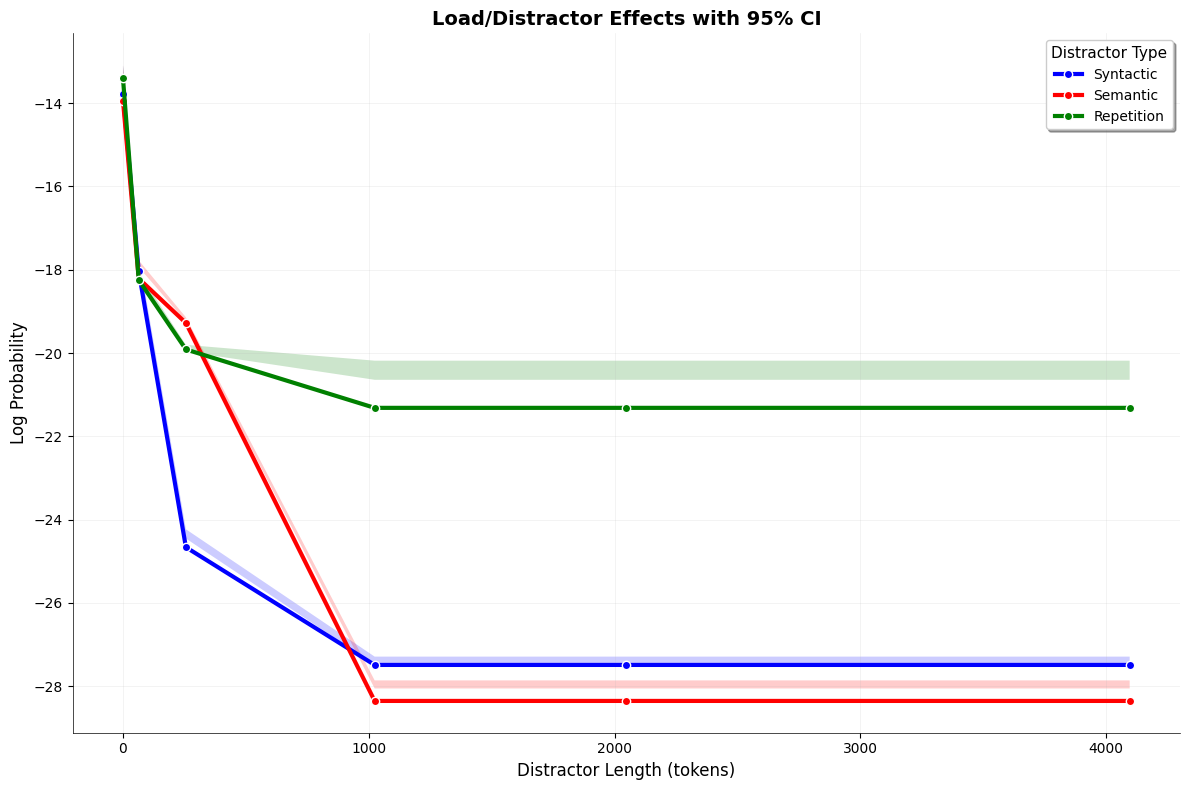

In [152]:
fig, ax = plt.subplots(figsize=(12, 8))

for dist_type in ['syntactic', 'semantic', 'repetition']:
    type_data = gpt2_e4_df[gpt2_e4_df['distractor_type'] == dist_type]
    color = colors[dist_type]
    
    unique_lengths = sorted(type_data['distractor_length'].unique())
    means = []
    ci_lower = []
    ci_upper = []

    for length in unique_lengths: 
        length_data = type_data[type_data['distractor_length'] == length]['logp'].values
        mean = np.mean(length_data)
        means.append(mean)
        
        sem = stats.sem(length_data)
        ci = stats.t.interval(0.95, len(length_data)-1, loc=mean, scale=sem)
        ci_lower.append(ci[0])
        ci_upper.append(ci[1])

    ax.fill_between(unique_lengths, ci_lower, ci_upper, alpha=0.2, color=color, edgecolor='none')
    
    smooth_data = type_data.groupby('distractor_length')['logp_smoothed'].first()
    ax.plot(smooth_data.index, smooth_data.values, 
            linewidth=3, color=color, label=f'{dist_type.capitalize()}',
            marker='o', markersize=6, markeredgecolor='white', markeredgewidth=1)

ax.set_xlabel('Distractor Length (tokens)', fontsize=12, fontweight='medium')
ax.set_ylabel('Log Probability', fontsize=12, fontweight='medium')
ax.set_title('Load/Distractor Effects with 95% CI', 
             fontsize=14, fontweight='bold')

ax.legend(title='Distractor Type', title_fontsize=11, fontsize=10, 
          loc='best', frameon=True, fancybox=True, shadow=True)

ax.grid(True, alpha=0.2, linestyle='-', linewidth=0.5)

ax.set_xticks([0, 1000, 2000, 3000, 4000])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.tight_layout()
plt.show()

# plt.savefig('distractor_effects.pdf', dpi=300, bbox_inches='tight')

## opt2.7 e4 graph

In [95]:
opt2_7_e4_df = pd.read_csv("Data/opt2.7/opt2.7 e4_results.csv")
opt2_7_e4_df

,id,distractor_type,distractor_length,logp,forbidden_concept,logp_smoothed
0,0,syntactic,0,-13.3125,thing,-12.315107
1,1,syntactic,0,-12.2500,thing,-12.315107
2,2,syntactic,0,-13.0000,thing,-12.315107
3,3,syntactic,0,-13.0000,thing,-12.315107
4,4,syntactic,0,-12.9375,thing,-12.315107
...,...,...,...,...,...,...
29983,1661,repetition,4096,-26.3750,tree,-20.980857
29984,1662,repetition,4096,-11.3125,tree,-20.980857
29985,1663,repetition,4096,-28.0000,tree,-20.980857
29986,1664,repetition,4096,-20.3750,tree,-20.980857


In [97]:
opt2_7_e4_aggregated_data = opt2_7_e4_df.groupby(['distractor_type', 'distractor_length'])['logp_smoothed'].agg(['mean', 'std', 'count']).reset_index()
opt2_7_e4_aggregated_data

,distractor_type,distractor_length,mean,std,count
0,repetition,0,-12.309894,0.0,1666
1,repetition,64,-18.133922,0.0,1666
2,repetition,256,-20.146494,0.0,1666
3,repetition,1024,-20.835277,0.0,1666
4,repetition,2048,-20.980857,0.0,1666
5,repetition,4096,-20.980857,0.0,1666
6,semantic,0,-12.331044,0.0,1666
7,semantic,64,-16.935786,0.0,1666
8,semantic,256,-19.694039,0.0,1666
9,semantic,1024,-20.795411,0.0,1666


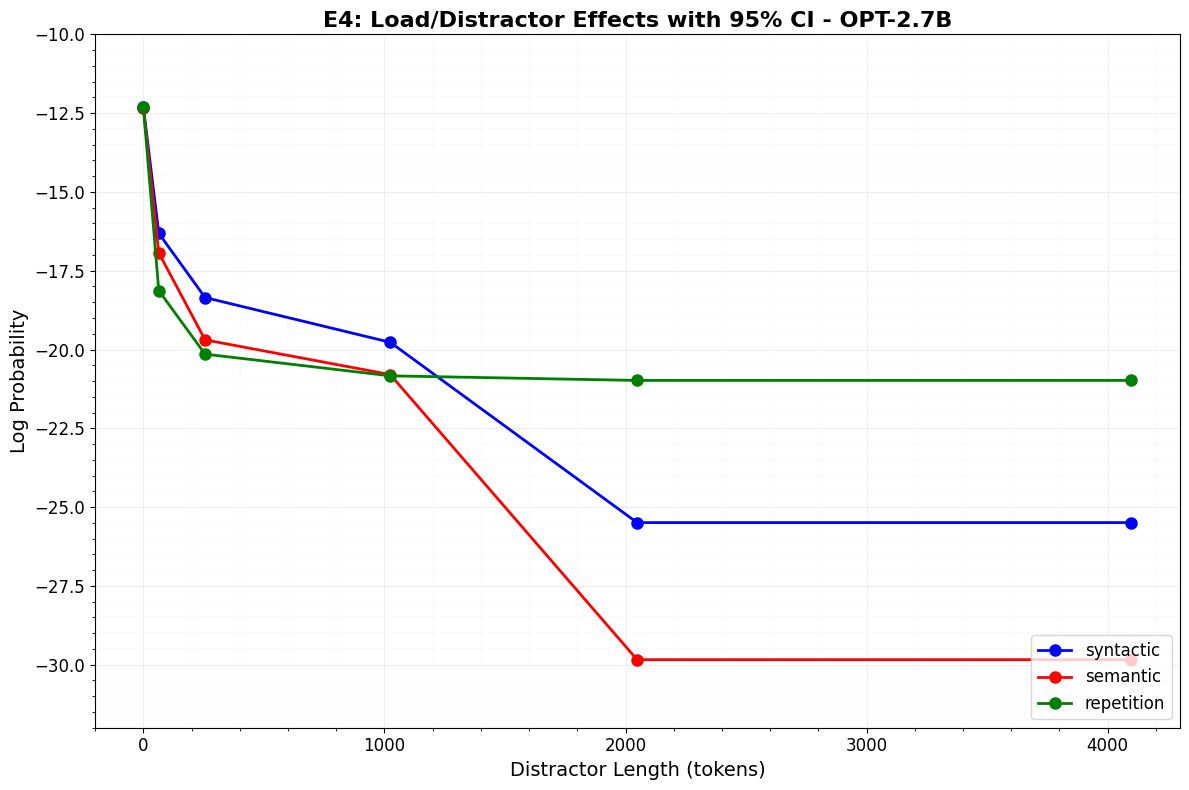

In [100]:
opt2_7_e4_aggregated_data.columns = ['distractor_type', 'distractor_length', 'logp_smoothed', 'std_logp', 'count']

opt_e4_syntactic_data = opt2_7_e4_aggregated_data[opt2_7_e4_aggregated_data['distractor_type'] == 'syntactic'].sort_values('distractor_length')
opt_e4_semantic_data = opt2_7_e4_aggregated_data[opt2_7_e4_aggregated_data['distractor_type'] == 'semantic'].sort_values('distractor_length')
opt_e4_repetition_data = opt2_7_e4_aggregated_data[opt2_7_e4_aggregated_data['distractor_type'] == 'repetition'].sort_values('distractor_length')

# Create the plot
plt.figure(figsize=(12, 8))

# Plot lines with markers (same style as reference graph)
plt.plot(opt_e4_syntactic_data['distractor_length'], opt_e4_syntactic_data['logp_smoothed'], 
         'o-', color='blue', linewidth=2, markersize=8, label='syntactic')
plt.plot(opt_e4_semantic_data['distractor_length'], opt_e4_semantic_data['logp_smoothed'], 
         'o-', color='red', linewidth=2, markersize=8, label='semantic')
plt.plot(opt_e4_repetition_data['distractor_length'], opt_e4_repetition_data['logp_smoothed'], 
         'o-', color='green', linewidth=2, markersize=8, label='repetition')

plt.xlabel('Distractor Length (tokens)', fontsize=14)
plt.ylabel('Log Probability', fontsize=14)
plt.title('E4: Load/Distractor Effects with 95% CI - OPT-2.7B', fontsize=16, fontweight='bold')

plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.15, linestyle='-', linewidth=0.3, which='minor')

plt.xlim(-200, 4300)
plt.ylim(-32, -10)

plt.xticks([0, 1000, 2000, 3000, 4000], fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12, loc='lower right')

plt.tight_layout()

plt.minorticks_on()

#plt.savefig('opt2.7_e4_graph.png',
#            dpi=300, 
#            bbox_inches='tight',
#            facecolor='white')

plt.show()

In [149]:
for dist_type in ['syntactic', 'semantic', 'repetition']:
    type_data = opt2_7_e4_df[opt2_7_e4_df['distractor_type'] == dist_type]
    
    print(f"\n{dist_type.upper()}:")
    for length in sorted(type_data['distractor_length'].unique()):
        length_data = type_data[type_data['distractor_length'] == length]
        raw_mean = length_data['logp'].mean()
        # Get the smoothed value (they should all be the same for a given length/type)
        smoothed_val = length_data['logp_smoothed'].iloc[0]
        
        print(f"  Length {length}: raw_mean={raw_mean:.4f}, smoothed={smoothed_val:.4f}, "
              f"diff={abs(raw_mean - smoothed_val):.4f}")


SYNTACTIC:
  Length 0: raw_mean=-12.0364, smoothed=-12.3151, diff=0.2787
  Length 64: raw_mean=-16.0589, smoothed=-16.3134, diff=0.2545
  Length 256: raw_mean=-18.0328, smoothed=-18.3506, diff=0.3179
  Length 1024: raw_mean=-19.5748, smoothed=-19.7709, diff=0.1961
  Length 2048: raw_mean=-24.6431, smoothed=-25.4910, diff=0.8479
  Length 4096: raw_mean=-24.6431, smoothed=-25.4910, diff=0.8479

SEMANTIC:
  Length 0: raw_mean=-12.0364, smoothed=-12.3310, diff=0.2946
  Length 64: raw_mean=-16.8958, smoothed=-16.9358, diff=0.0400
  Length 256: raw_mean=-19.6129, smoothed=-19.6940, diff=0.0811
  Length 1024: raw_mean=-20.7608, smoothed=-20.7954, diff=0.0346
  Length 2048: raw_mean=-29.1292, smoothed=-29.8407, diff=0.7115
  Length 4096: raw_mean=-29.1292, smoothed=-29.8407, diff=0.7115

REPETITION:
  Length 0: raw_mean=-12.0364, smoothed=-12.3099, diff=0.2735
  Length 64: raw_mean=-17.9995, smoothed=-18.1339, diff=0.1344
  Length 256: raw_mean=-20.1519, smoothed=-20.1465, diff=0.0054
  Lengt

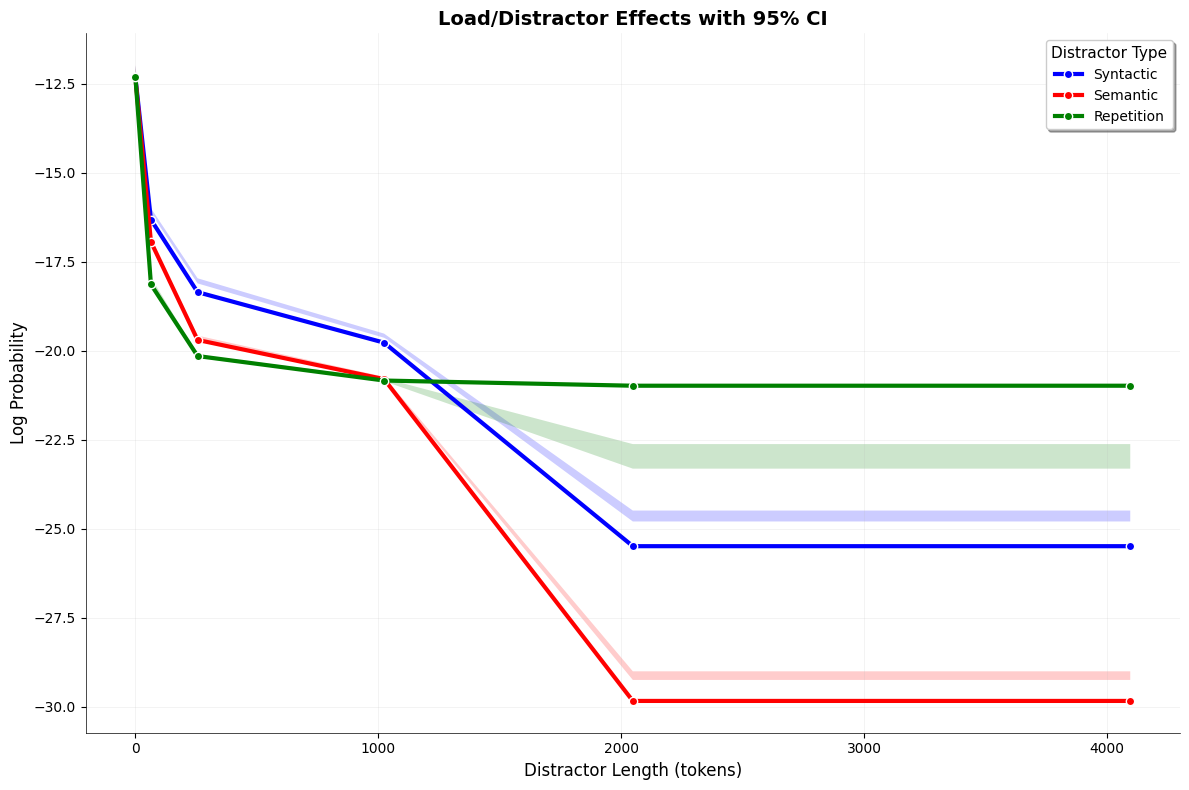

In [153]:
fig, ax = plt.subplots(figsize=(12, 8))

for dist_type in ['syntactic', 'semantic', 'repetition']:
    type_data = opt2_7_e4_df[opt2_7_e4_df['distractor_type'] == dist_type]
    color = colors[dist_type]
    
    unique_lengths = sorted(type_data['distractor_length'].unique())
    means = []
    ci_lower = []
    ci_upper = []

    for length in unique_lengths: 
        length_data = type_data[type_data['distractor_length'] == length]['logp'].values
        mean = np.mean(length_data)
        means.append(mean)
        
        sem = stats.sem(length_data)
        ci = stats.t.interval(0.95, len(length_data)-1, loc=mean, scale=sem)
        ci_lower.append(ci[0])
        ci_upper.append(ci[1])

    ax.fill_between(unique_lengths, ci_lower, ci_upper, alpha=0.2, color=color, edgecolor='none')
    
    smooth_data = type_data.groupby('distractor_length')['logp_smoothed'].first()
    ax.plot(smooth_data.index, smooth_data.values, 
            linewidth=3, color=color, label=f'{dist_type.capitalize()}',
            marker='o', markersize=6, markeredgecolor='white', markeredgewidth=1)

ax.set_xlabel('Distractor Length (tokens)', fontsize=12, fontweight='medium')
ax.set_ylabel('Log Probability', fontsize=12, fontweight='medium')
ax.set_title('Load/Distractor Effects with 95% CI', 
             fontsize=14, fontweight='bold')

ax.legend(title='Distractor Type', title_fontsize=11, fontsize=10, 
          loc='best', frameon=True, fancybox=True, shadow=True)

ax.grid(True, alpha=0.2, linestyle='-', linewidth=0.5)

ax.set_xticks([0, 1000, 2000, 3000, 4000])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.tight_layout()
plt.show()

# plt.savefig('distractor_effects.pdf', dpi=300, bbox_inches='tight')

## Graph for all three models

In [126]:
def add_confidence_interval(df):
    """Process dataframe and return separated data by distractor type with confidence intervals"""    
    
    confidence_level = 0.95
    alpha = 1 - confidence_level
    
    plot_data['margin_error'] = plot_data.apply(
        lambda row: stats.t.ppf(1 - alpha/2, row['count'] - 1) * (row['std_logp'] / np.sqrt(row['count'])) 
        if row['count'] > 1 and not pd.isna(row['std_logp']) else 0, axis=1
    )
    
    plot_data['ci_lower'] = plot_data['logp_smoothed'] - plot_data['margin_error']
    plot_data['ci_upper'] = plot_data['logp_smoothed'] + plot_data['margin_error']
    
    syntactic = plot_data[plot_data['distractor_type'] == 'syntactic'].sort_values('distractor_length')
    semantic = plot_data[plot_data['distractor_type'] == 'semantic'].sort_values('distractor_length')
    repetition = plot_data[plot_data['distractor_type'] == 'repetition'].sort_values('distractor_length')
    
    return syntactic, semantic, repetition

In [127]:
all_data = []

for df in [gemma_e4_df, gpt2_e4_df, opt2_7_e4_df]:
    temp_syntactic, temp_semantic, temp_repetition = add_confidence_interval(df)
    for data in [temp_syntactic, temp_semantic, temp_repetition]:
        all_data.extend(data['ci_lower'].values)
        all_data.extend(data['ci_upper'].values)

global_ymin = min(all_data) - 2 
global_ymax = max(all_data) + 2 

models = [
    {
        'name': 'Gemma 7B-IT',
        'data': (gemma_e4_syntactic_data, gemma_e4_semantic_data, gemma_e4_repetition_data),
        'ylim': (global_ymin, global_ymax)
    },
    {
        'name': 'GPT-2 Small',
        'data': (gpt2_e4_syntactic_data, gpt2_e4_semantic_data, gpt2_e4_repetition_data),
        'ylim': (global_ymin, global_ymax)
    },
    {
        'name': 'OPT-2.7B',
        'data': (opt_e4_syntactic_data, opt_e4_semantic_data, opt_e4_repetition_data),
        'ylim': (global_ymin, global_ymax)
    }
]

TypeError: add_confidence_interval.<locals>.<lambda>() got an unexpected keyword argument 'axis'

In [124]:
all_data

[np.float64(-29.76468767079951),
 np.float64(-25.743454028963345),
 np.float64(-26.70009527437433),
 np.float64(-26.809619101622257),
 np.float64(-27.670180691805108),
 np.float64(-52.7015016371458),
 np.float64(-29.76468767079951),
 np.float64(-25.743454028963345),
 np.float64(-26.70009527437433),
 np.float64(-26.809619101622257),
 np.float64(-27.670180691805108),
 np.float64(-52.7015016371458),
 np.float64(-29.8366488745694),
 np.float64(-26.14719472510571),
 np.float64(-27.0911958138146),
 np.float64(-27.89347433145345),
 np.float64(-28.57394647195244),
 np.float64(-48.840737160150326),
 np.float64(-29.8366488745694),
 np.float64(-26.14719472510571),
 np.float64(-27.0911958138146),
 np.float64(-27.89347433145345),
 np.float64(-28.57394647195244),
 np.float64(-48.840737160150326),
 np.float64(-29.71392163567936),
 np.float64(-25.225890578592917),
 np.float64(-24.4885119428135),
 np.float64(-28.467428832705234),
 np.float64(-30.034045108618717),
 np.float64(-30.58248606084469),
 np.fl

KeyError: 'ci_lower'

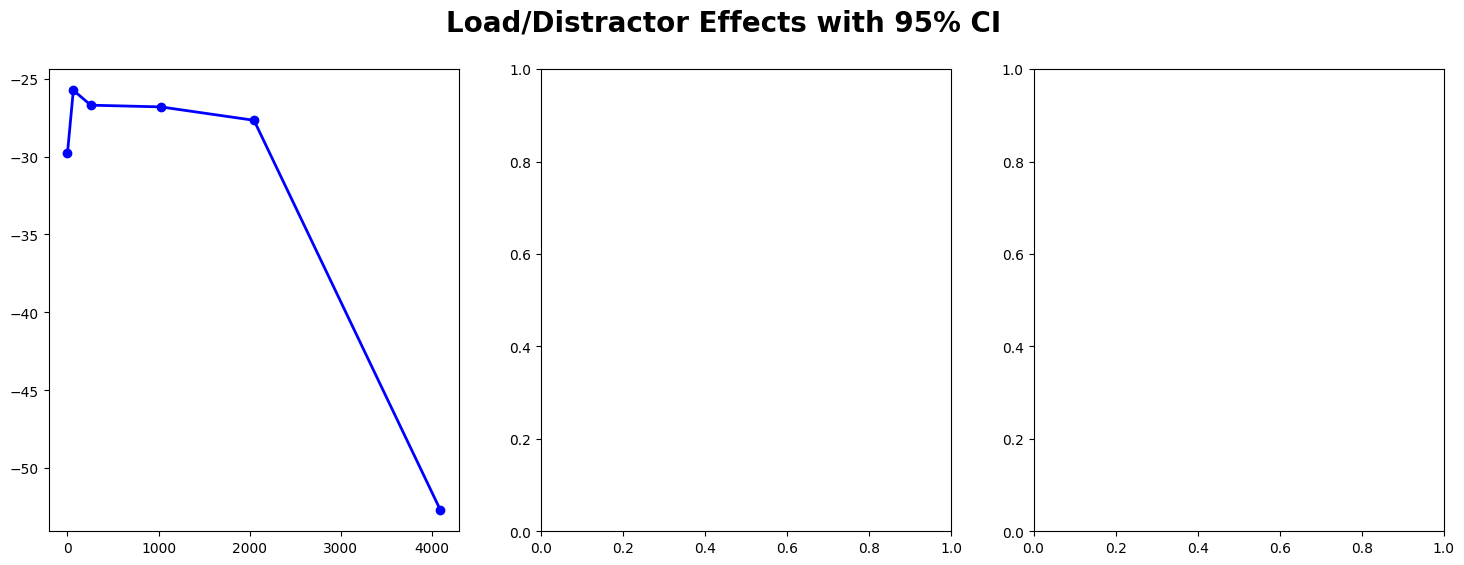

In [125]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

fig.suptitle('Load/Distractor Effects with 95% CI', fontsize=20, fontweight='bold', y=0.98)

for i, model in enumerate(models):
    ax = axes[i]
    syntactic, semantic, repetition = model['data']

    # syntactic
    ax.plot(syntactic['distractor_length'], syntactic['logp_smoothed'], 
            'o-', color='blue', linewidth=2, markersize=6, label='syntactic')
    ax.fill_between(syntactic['distractor_length'], 
                    syntactic['ci_lower'], syntactic['ci_upper'], 
                    color='blue', alpha=0.2)
    
    # Semantic (red)
    ax.plot(semantic['distractor_length'], semantic['logp_smoothed'], 
            'o-', color='red', linewidth=2, markersize=6, label='semantic')
    ax.fill_between(semantic['distractor_length'], 
                    semantic['ci_lower'], semantic['ci_upper'], 
                    color='red', alpha=0.2)
    
    # Repetition (green)
    ax.plot(repetition['distractor_length'], repetition['logp_smoothed'], 
            'o-', color='green', linewidth=2, markersize=6, label='repetition')
    ax.fill_between(repetition['distractor_length'], 
                    repetition['ci_lower'], repetition['ci_upper'], 
                    color='green', alpha=0.2)
    
    ax.set_xlabel('Distractor Length (tokens)', fontsize=12)
    ax.set_ylabel('Log Probability', fontsize=12)
    ax.set_title(model['name'], fontsize=14, fontweight='bold', pad=10)
    
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    ax.grid(True, alpha=0.15, linestyle='-', linewidth=0.3, which='minor')
    
    ax.set_xlim(-200, 4300)
    ax.set_ylim(model['ylim'])
    
    ax.set_xticks([0, 1000, 2000, 3000, 4000])
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    if i == 2: 
        ax.legend(fontsize=10, loc='lower right')
    
    ax.minorticks_on()
    
plt.tight_layout()
plt.subplots_adjust(top=0.88) 

#plt.savefig('all_models_e4_graph',
            #dpi=300,
            #bbox_inches='tight', 
            #facecolor='white')

plt.show()

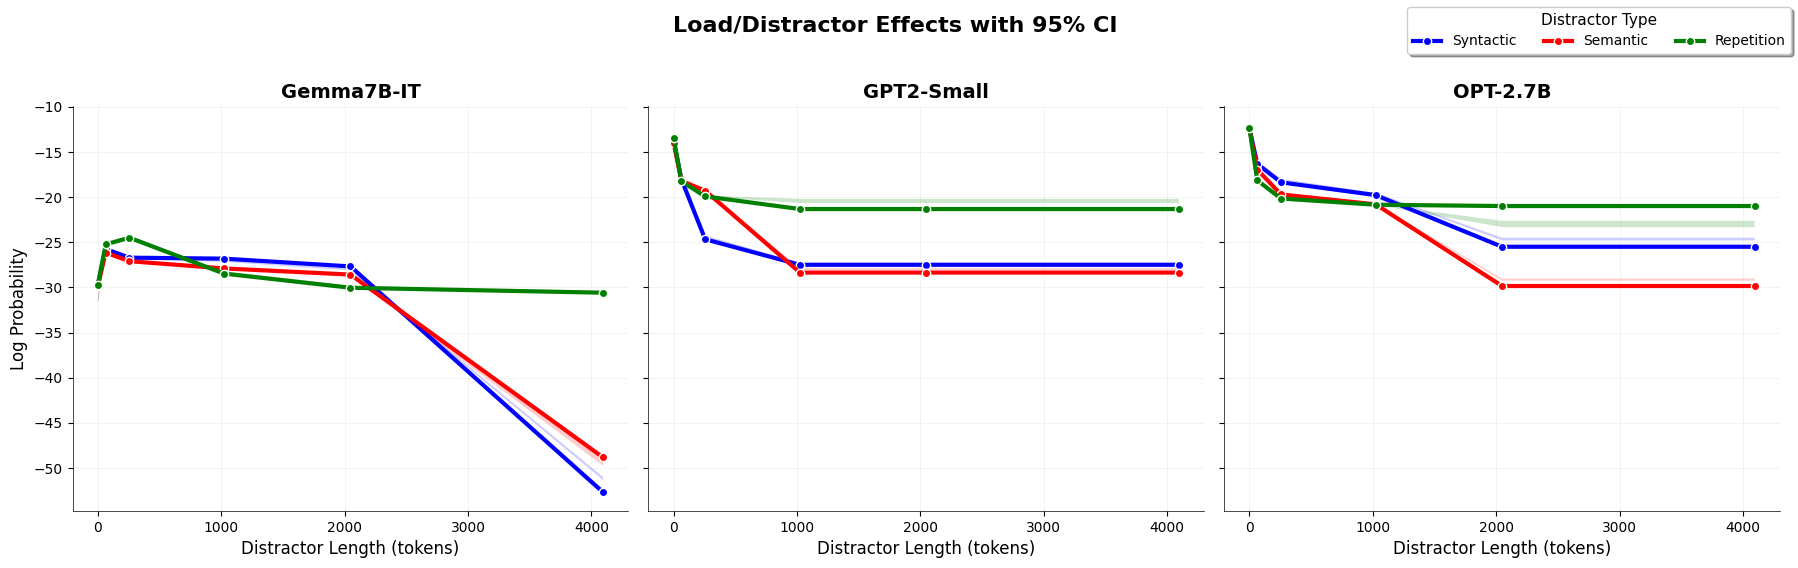

In [163]:
models = [
    ("Gemma7B-IT", gemma_e4_df),
    ("GPT2-Small", gpt2_e4_df),
    ("OPT-2.7B", opt2_7_e4_df)
]

dist_types = ['syntactic', 'semantic', 'repetition']

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for ax, (model_name, df) in zip(axes, models):
    for dist_type in dist_types:
        type_data = df[df['distractor_type'] == dist_type]
        color = colors[dist_type]

        unique_lengths = sorted(type_data['distractor_length'].unique())
        means, ci_lower, ci_upper = [], [], []

        for length in unique_lengths:
            length_data = type_data[type_data['distractor_length'] == length]['logp'].values
            mean = np.mean(length_data)
            means.append(mean)

            sem = stats.sem(length_data)
            ci = stats.t.interval(0.95, len(length_data)-1, loc=mean, scale=sem)
            ci_lower.append(ci[0])
            ci_upper.append(ci[1])

        ax.fill_between(unique_lengths, ci_lower, ci_upper, alpha=0.2, color=color, edgecolor='none')

        smooth_data = type_data.groupby('distractor_length')['logp_smoothed'].first()
        ax.plot(
            smooth_data.index, smooth_data.values,
            linewidth=3, color=color, label=f'{dist_type.capitalize()}',
            marker='o', markersize=6, markeredgecolor='white', markeredgewidth=1
        )

    ax.set_xlabel('Distractor Length (tokens)', fontsize=12, fontweight='medium')
    ax.set_title(model_name, fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.2, linestyle='-', linewidth=0.5)
    ax.set_xticks([0, 1000, 2000, 3000, 4000])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)

axes[0].set_ylabel('Log Probability', fontsize=12, fontweight='medium')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Distractor Type", title_fontsize=11, fontsize=10,
           loc='upper right', ncol=3, frameon=True, fancybox=True, shadow=True)

fig.suptitle("Load/Distractor Effects with 95% CI", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.05, 1, 0.95]) 

plt.savefig('e4_combined.png', dpi=300, bbox_inches='tight')

plt.show()